# **Challenge of the Week - ML Workflow**

© 2023, Zaka AI, Inc. All Rights Reserved.

---

## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

from scipy.stats import chi2_contingency

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [ ]:
#Test Your Zaka
# clone git repo
!git clone https://github.com/royaad/AIC
# change working directory
%cd AIC/Week_04/data

Cloning into 'AIC'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 37 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 30.66 KiB | 1.70 MiB/s, done.
/content/AIC/Week_04/data


In [ ]:
#Specifying the filenames
filename = 'insurance.csv'
#Reading the files with read_csv
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
#Test Your Zaka
nrows, ncols = df.shape
print(f"df has {nrows} rows and {ncols} columns")

df has 1338 rows and 7 columns


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
#Test Your Zaka
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

<Axes: xlabel='smoker', ylabel='Count'>

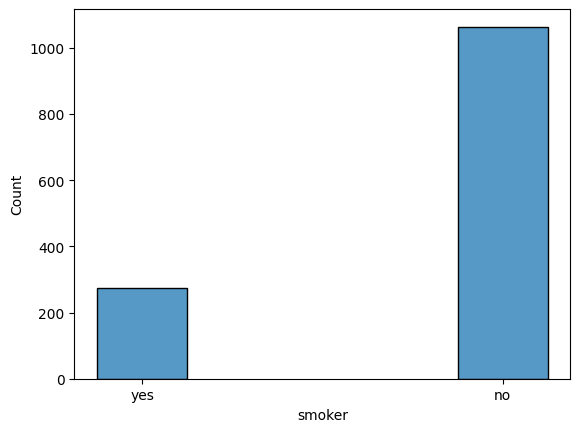

In [ ]:
#Test Your Zaka
col = 'smoker'
#hist plot
plt.figure()
sns.histplot(x=col,data=df,shrink=.25)

We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


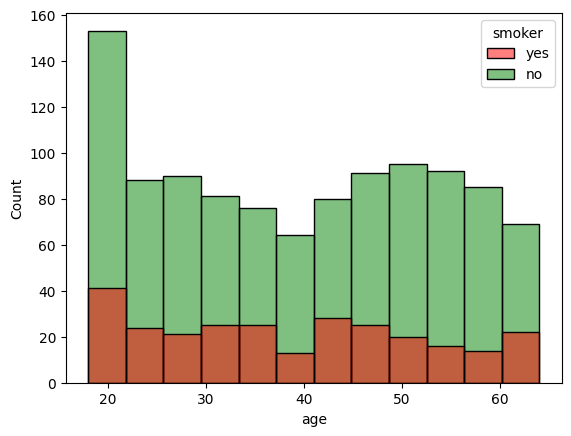

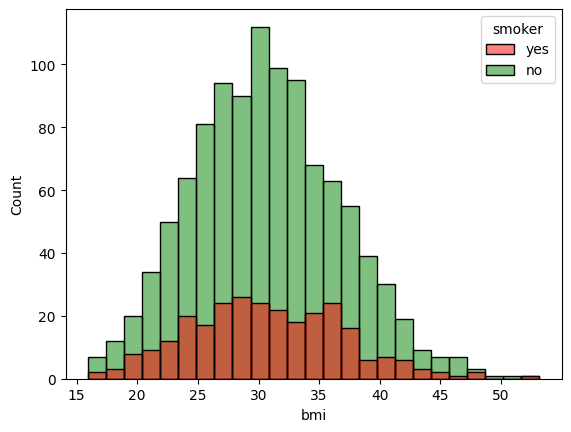

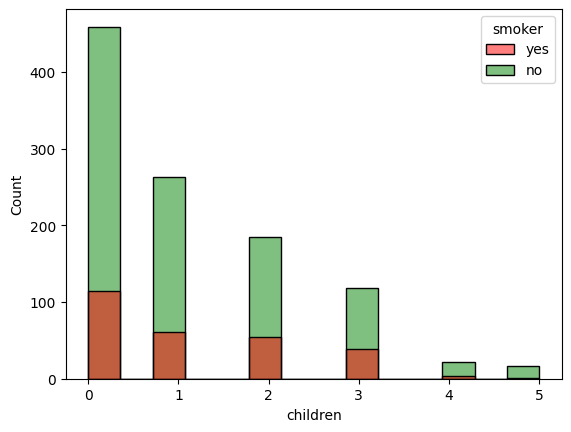

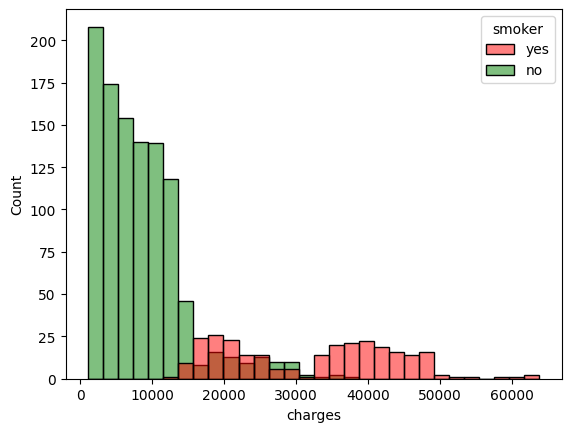

In [ ]:
#Test Your Zaka
cols = df.select_dtypes("number").columns
#Checking the Selected columns
print(cols)

for i in cols:
    plt.figure()
    sns.histplot(x=i,data=df,hue='smoker',palette=['r','g'])

What do you think is the feature that tells us the most about a person being smoker or not?

**Charges is the feature that tells us the most about a person being a smoker or not. We can see from the distribution plots that smokers, in average, pay higher charges than non-smokers. The other features do not show a clear trend, meaning they have almost the same mean and variance.**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

In [ ]:
#Test Your Zaka
ind = 'sex'
col = 'smoker'
#Crosstabing with normalization along the index (i.e. rows) for an easier read of percentages.
crosstable = pd.crosstab(df[ind], df[col])
#Calculating the Chi2 and p values
c, p, _, _ = chi2_contingency(crosstable)
if p <= .05:
    print(f"\nThe obtained p-value of %.4f is less than 0.05" %(p))
    print("We reject the null hypothesis")
else:
    print("\nThe obtained p-value of %.4f is more than 0.05" %(p))
    print("There is not enough evidence to reject the null hypothesis")

pd.crosstab(df[ind], df[col],normalize='index')


The obtained p-value of 0.0065 is less than 0.05
We reject the null hypothesis


smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


Do you think the gender has an effect on smoking according to your results?

**We see that 17.4% of women smoke, while 23.5% of men smoke. A 6% difference between both. According to the p-value, this difference is not do to random chance. Thus, we can say that gender has an effect on smoking. Being a man will more likely make you more prone to smoking.**

Do the same for the column 'region'

In [ ]:
#Test Your Zaka
ind = 'smoker'
col = 'region'
#Crosstabing with normalization along the index (i.e. rows) for an easier read of percentages.
crosstable = pd.crosstab(df[ind], df[col])
#Calculating the Chi2 and p values
c, p, _, _ = chi2_contingency(crosstable)
if p <= .05:
    print(f"\nThe obtained p-value of %.4f is less than 0.05" %(p))
    print("We reject the null hypothesis")
else:
    print("\nThe obtained p-value of %.4f is more than 0.05" %(p))
    print("There is not enough evidence to reject the null hypothesis")

pd.crosstab(df[ind], df[col],normalize='columns')


The obtained p-value of 0.0617 is more than 0.05
There is not enough evidence to reject the null hypothesis


region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.79321,0.821538,0.75,0.821538
yes,0.20679,0.178462,0.25,0.178462


## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
#Test Your Zaka
print ("Missing values per column:\n")
print (df.isnull().sum(axis = 0))

Missing values per column:

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


Drop rows with missing values, and make sure you have no nulls anymore.

In [ ]:
#Test Your Zaka
#Dropping na values
df.dropna(inplace=True)

See the type of each of your columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Test Your Zaka
sexdict = {'male' : 0, 'female' : 1}
#inplace does not work for apply.
df['sex'] = df['sex'].apply(lambda x: sexdict[x])
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
5,31,1,25.740,0,no,southeast,3756.62160
6,46,1,33.440,1,no,southeast,8240.58960
7,37,1,27.740,3,no,northwest,7281.50560
8,37,0,29.830,2,no,northeast,6406.41070
9,60,1,25.840,0,no,northwest,28923.13692


And now the smokers column

In [ ]:
#Test Your Zaka
smokerdict = {'no' : 0, 'yes' : 1}
df['smoker'] = df['smoker'].apply(lambda x: smokerdict[x])
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


And now the Region Column

**In week 2, we deleted the region column as it has no great effect on the model. The crosstab investigation also shows that the region is not of great importance to determine who is a smoker or not. However, for this week, I will keep the region column at first, just to try something new and see if the Lasso penalty is able to cancel out the regions or some of them.**

In [ ]:
#Test Your Zaka
#for the region column, I will use one-hot encoding, since it is more accurate at describing non-binary nominal data.
#dropping the first column to avoid the dummy variable trap
col = 'region'
df = pd.get_dummies(df, prefix=col, prefix_sep='.', columns=[col], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region.northwest,region.southeast,region.southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
#Test Your Zaka
MAX = df.max()
print(MAX)
df = df.divide(MAX)
df.describe()

age                    64.00000
sex                     1.00000
bmi                    53.13000
children                5.00000
smoker                  1.00000
charges             63770.42801
region.northwest        1.00000
region.southeast        1.00000
region.southwest        1.00000
dtype: float64


,age,sex,bmi,children,smoker,charges,region.northwest,region.southeast,region.southwest
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299,0.242697,0.272659,0.241948
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041,0.428874,0.445494,0.428423
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592,0.000000,0.000000,0.000000
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365,0.000000,0.000000,0.000000
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187,0.000000,0.000000,0.000000
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [ ]:
#Test Your Zaka
target_col = 'smoker'
# store all columns except smoker one as inputs in X
X_smoker = df.drop(target_col, axis=1).values
# this is equivalent to X = df.iloc[:,[0,1,2,3,5]].values
# store the smoker column as the output (label) in y
y_smoker = df[target_col].values

# split dataset in a 80/20 split
x_smoker_train, x_smoker_test, y_smoker_train, y_smoker_test = train_test_split(X_smoker, y_smoker, test_size=0.2, random_state=42)

print(x_smoker_train.shape, y_smoker_train.shape)
print(x_smoker_test.shape, y_smoker_test.shape)

(1068, 8) (1068,)
(267, 8) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

Model trained!
[-2.26309173 -0.25295667 -3.17760684 -0.34964675 10.02909094 -0.01470683
  0.30658648 -0.10988585]


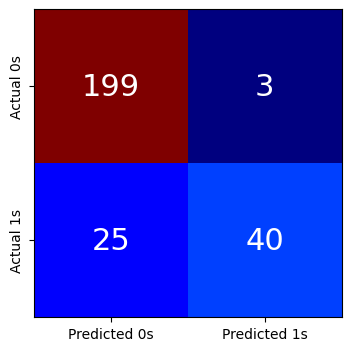

In [ ]:
#Test Your Zaka
# define our regression model
model_1 = LogisticRegression()

# train our model
model_1.fit(x_smoker_train, y_smoker_train)
print('Model trained!')
# weights
weights = model_1.coef_[0]
print(weights)

cm = confusion_matrix(y_smoker_test, model_1.predict(x_smoker_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm,cmap='jet')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.set_yticks((0, 1))
ax.set_yticklabels(labels=('Actual 0s', 'Actual 1s'),rotation = 90,va='center')

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white',fontsize=22)
plt.show()

#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
#Test Your Zaka
accuracy = model_1.score(x_smoker_test,y_smoker_test)
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_smoker_test, model_1.predict(x_smoker_test),average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 89.5%
The presicion of the model is: 93.0%
The recall of the model is: 61.5%
The F1 score of the model is: 74.1%


Which metrics you think can be improved?

**Recall is a bit low with 61.5%. We can improve the recall, and therefore, the F1 score.**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

<Axes: ylabel='Count'>

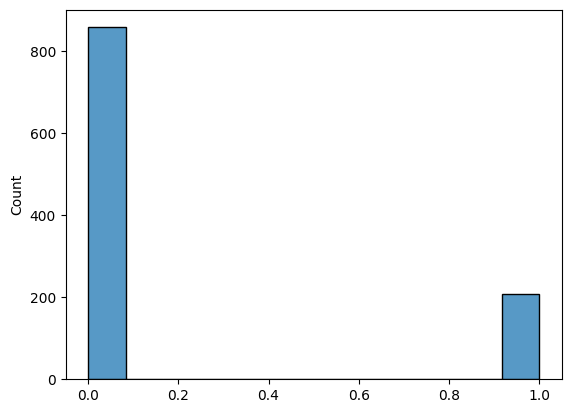

In [ ]:
#Test Your Zaka
#We should only over- and under- sample the training dataset and leave the test dataset untouched
#hist plot
plt.figure()
sns.histplot(x=y_smoker_train)

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy = .5, random_state = 42)
x_over, y_over = over.fit_resample(x_smoker_train, y_smoker_train)

under = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
x_new, y_new = under.fit_resample(x_over, y_over)

Plot a new histogram on the new data we have.

Text(0.5, 1.0, 'New Sampling')

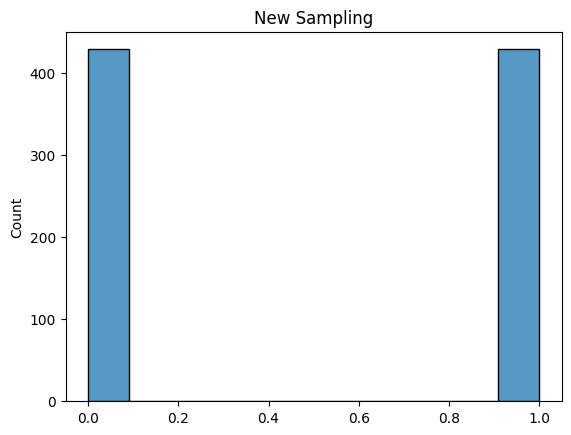

In [ ]:
#Test Your Zaka
plt.figure()
sns.histplot(data=y_new)
plt.title('New Sampling')

#### New Sampling

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
#Test Your Zaka
#There's no need for this part since the train/test split is realized before.

Model trained!


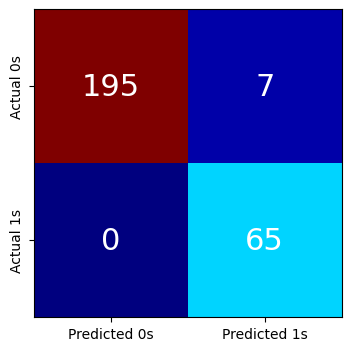

In [ ]:
#Test Your Zaka
# define our regression model
model_2 = LogisticRegression()

# train our model on over sampled data
model_2.fit(x_new, y_new)
print('Model trained!')

cm = confusion_matrix(y_smoker_test, model_2.predict(x_smoker_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm,cmap='jet')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.set_yticks((0, 1))
ax.set_yticklabels(labels=('Actual 0s', 'Actual 1s'),rotation = 90,va='center')

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white',fontsize=22)
plt.show()

Asses your model on the testing data, and Compute the same metrics you computed before

In [ ]:
#Test Your Zaka
#We use the over sampled testing data.
accuracy = model_2.score(x_smoker_test,y_smoker_test)
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_smoker_test, model_2.predict(x_smoker_test),average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 97.4%
The presicion of the model is: 90.3%
The recall of the model is: 100.0%
The F1 score of the model is: 94.9%


##### Extra: fit feauture coeffs

            feature  importance
5  region.northwest    0.141436
1               sex    0.172371
7  region.southwest    0.241884
3          children    0.261256
6  region.southeast    0.321719
0               age    2.772846
2               bmi    3.650524
4           charges   10.934657


<Axes: ylabel='feature'>

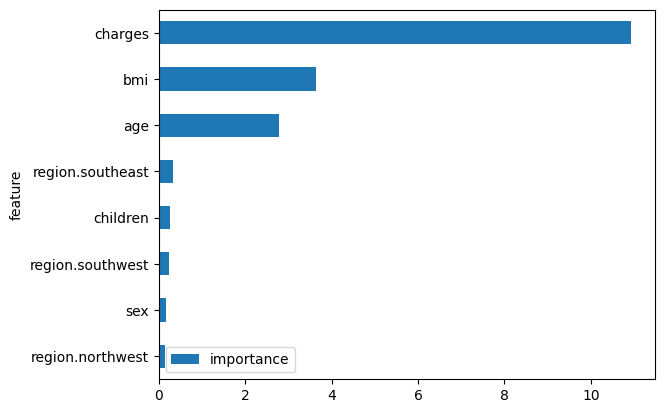

In [ ]:
#Test Your Zaka
weights = model_2.coef_[0]
#we have 9 features
feature_names = df.drop(target_col, axis=1).columns
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
#we care more about the absolute value
feature_importance["importance"] = abs(weights)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
print(feature_importance.head(9))
feature_importance.plot.barh(x='feature', y='importance')

**We can see that the regions, sex, and children have really low coefficients, yet they are not 0.**

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [ ]:
#Test Your Zaka
# define our regression model
model_4 = LogisticRegression(solver='liblinear')
# Importing GridSearch
from sklearn.model_selection import GridSearchCV
# the grid values should be defined as a library with the keys being the hyperparameters to tune and the values being the hyperparameter values.
grid_values = {'penalty': ['l1', 'l2'],'C':[.1,1,10,100,1000]}
# GridSearchCV passes all combinations of hyperparameters one by one into the model and check the result.
# I choose to score based on accuracy
GS = GridSearchCV(estimator = model_4, param_grid = grid_values,scoring = 'accuracy',n_jobs=-1,verbose=1)
# Tunning hyperparameters
GS.fit(x_new, y_new)
print('Hyper Tuning Done!')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyper Tuning Done!


In [ ]:
# printing best score
print('The best accuracy is: %.1f%%' %(100*GS.best_score_))
# printing best hyperparameters
print(f'The best parameters are: {GS.best_params_}')

The best accuracy is: 98.1%
The best parameters are: {'C': 100, 'penalty': 'l1'}


**Not a big increase as compared to unbalanced and balanced data. I believe that this is because the data was heavily unbalanced and, therefore, the balance was the major issue.**

Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
#Test Your Zaka

accuracy = accuracy_score(y_smoker_test, GS.predict(x_smoker_test))
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_smoker_test, GS.predict(x_smoker_test),average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 98.1%
The presicion of the model is: 92.9%
The recall of the model is: 100.0%
The F1 score of the model is: 96.3%


We can see that the results improved compared to the last model we built.

####Extra: Investigating the Coefficients of the Best Estimator.

            feature  importance
5  region.northwest    0.148377
7  region.southwest    0.503861
6  region.southeast    0.612994
1               sex    0.687191
3          children    2.176617
0               age   10.820952
2               bmi   29.688131
4           charges   38.402240


<Axes: ylabel='feature'>

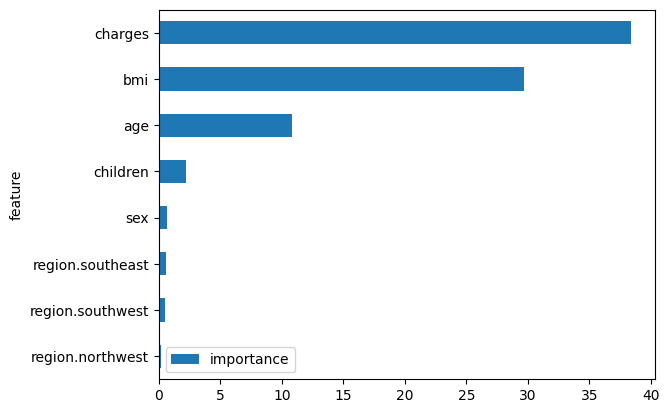

In [ ]:
#Test Your Zaka
weights = GS.best_estimator_.coef_[0]
#we have 9 features
feature_names = df.drop(target_col, axis=1).columns
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
#we care more about the absolute value
feature_importance["importance"] = abs(weights)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
print(feature_importance.head(9))
feature_importance.plot.barh(x='feature', y='importance')

**Lasso penalty was not able to set the regions to 0. In other cases, some regions were set to 0. This could mean that the region feature is not that important and can be dropped.**

#### Extra: Dropping region and refitting

In [ ]:
#Test Your Zaka
#Dropping region
df.drop(df.columns[-3:], axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.060637


In [ ]:
#Test Your Zaka
X_smoker = df.drop(target_col, axis=1).values
y_smoker = df[target_col].values

x_smoker_train, x_smoker_test, y_smoker_train, y_smoker_test = train_test_split(X_smoker, y_smoker, test_size=0.2, random_state=42)

over = RandomOverSampler(sampling_strategy = .5, random_state = 42)
x_over, y_over = over.fit_resample(x_smoker_train, y_smoker_train)
under = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
x_new, y_new = under.fit_resample(x_over, y_over)

In [ ]:
#Test Your Zaka
# define our regression model
model_5 = LogisticRegression(solver='liblinear')
# Importing GridSearch
from sklearn.model_selection import GridSearchCV
# the grid values should be defined as a library with the keys being the hyperparameters to tune and the values being the hyperparameter values.
grid_values = {'penalty': ['l1', 'l2'],'C':[.1,1,10,100,1000]}
# GridSearchCV passes all combinations of hyperparameters one by one into the model and check the result.
# I choose to score based on accuracy
GS = GridSearchCV(estimator = model_5, param_grid = grid_values,scoring = 'accuracy',n_jobs=-1,verbose=1)
# Tunning hyperparameters
GS.fit(x_new, y_new)
print('Hyper Tuning Done!')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyper Tuning Done!


In [ ]:
# printing best score
print('The best accuracy is: %.1f%%' %(100*GS.best_score_))
# printing best hyperparameters
print(f'The best parameters are: {GS.best_params_}')

The best accuracy is: 98.3%
The best parameters are: {'C': 100, 'penalty': 'l1'}


In [ ]:
#Test Your Zaka
accuracy = accuracy_score(y_smoker_test, GS.predict(x_smoker_test))
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_smoker_test, GS.predict(x_smoker_test),average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 98.1%
The presicion of the model is: 92.9%
The recall of the model is: 100.0%
The F1 score of the model is: 96.3%


    feature  importance
1       sex    0.654759
3  children    2.083671
0       age   10.672165
2       bmi   29.233034
4   charges   38.567822


<Axes: ylabel='feature'>

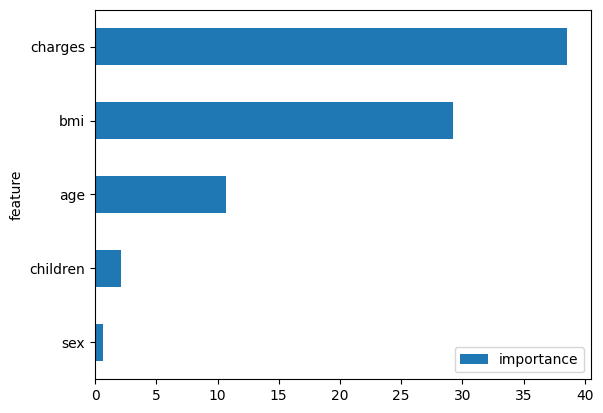

In [ ]:
#Test Your Zaka
weights = GS.best_estimator_.coef_[0]
col = 'smoker'
#we have 11 features so 11 weights
feature_names = df.drop(col, axis=1).columns
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
#we care more about the absolute value
feature_importance["importance"] = abs(weights)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
print(feature_importance.head(9))
feature_importance.plot.barh(x='feature', y='importance')

**After removing the region, we still obtain similar metrics, thus justifying the choice of removing the region.**

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [ ]:
#Test Your Zaka
#We continue without the region.
#Run cells in previous section.
from sklearn.ensemble import AdaBoostClassifier

adamodel = AdaBoostClassifier(n_estimators=10)
adamodel.fit(x_new, y_new)
print('Model trained!')

Model trained!


Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
#Test Your Zaka
accuracy = accuracy_score(y_smoker_test, adamodel.predict(x_smoker_test))
print('The accuracy of the model is: %.1f%%' %(100*accuracy))

pres, rec, f1s, _ = precision_recall_fscore_support(y_smoker_test, adamodel.predict(x_smoker_test),average='binary')
print('The presicion of the model is: %.1f%%' %(100*pres))
print('The recall of the model is: %.1f%%' %(100*rec))
print('The F1 score of the model is: %.1f%%' %(100*f1s))

The accuracy of the model is: 97.4%
The presicion of the model is: 90.3%
The recall of the model is: 100.0%
The F1 score of the model is: 94.9%


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [ ]:
#Test Your Zaka
adamodel = AdaBoostClassifier()
# Importing GridSearch
from sklearn.model_selection import GridSearchCV
# the grid values should be defined as a library with the keys being the hyperparameters to tune and the values being the hyperparameter values.
grid_values = {'n_estimators':[5,10,25,50,75,100],'learning_rate':[.001,.01,1,10,100]}
# GridSearchCV passes all combinations of hyperparameters one by one into the model and check the result.
# I choose to score based on roc_auc
GS = GridSearchCV(estimator = adamodel, param_grid = grid_values,scoring = 'roc_auc',n_jobs=-1,verbose=1)
# Tunning parameters
GS.fit(x_new, y_new)
print('Hyper Tuning Done!')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Hyper Tuning Done!


In [ ]:
# printing best score
print('The best ROC AUC is: %.1f%%' %(100*GS.best_score_))
# printing best parameters
print(f'The best parameters are: {GS.best_params_}')

The best ROC AUC is: 99.0%
The best parameters are: {'learning_rate': 1, 'n_estimators': 75}


**We can also think of changing the parameters of the decision tree, more specifically the depth and the splitting criterion. However, here, I restrict the search to the basic stump estimator.**